Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

Importing of dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the diabetes dataset to a pandas DataFrame
data_path="/content/drive/MyDrive/cp2_datasets/CP2_Data_sets/diabetes.csv"
diabetes_data=pd.read_csv(data_path)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# number of rows and Columns in this dataset
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# printing the first 5 rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# getting the statistical measures of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


where 0--> Non-Diabetic and 1--> Diabetic
      





In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


After grouping, it calculates the mean (average) of each numeric column within each group

1.To understand feature behavior based on outcome

2.To detect patterns

3.Feature selection and hypothesis

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# separating the data and labels
X = diabetes_data.drop(columns = 'Outcome', axis=1)
Y = diabetes_data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=42)
X_balanced, Y_balanced = smote.fit_resample(X, Y)

In [ ]:
print(Y_balanced.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


# Split the balanced dataset


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)

## Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train SVM model

What is SVM? Support Vector Machine is a machine learning algorithm used mostly for classification tasks. It works by finding the best boundary (hyperplane) that separates different classes of data

Creating an SVM classifier with a linear kernel (for linearly separable data)

In [ ]:
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train_scaled, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("diabetes_model.sav", "wb"))
pickle.dump(scaler, open("scaler_diabetes.sav", "wb"))

In [ ]:
print(" Model and scaler saved successfully!")

 Model and scaler saved successfully!


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the training data
y_train_pred = model.predict(X_train_scaled)  # Use scaled data

# Accuracy
print('Accuracy: {:.3f}'.format(accuracy_score(Y_train, y_train_pred)))

# Precision
print('Precision: {:.3f}'.format(precision_score(Y_train, y_train_pred)))

# Recall
print('Recall: {:.3f}'.format(recall_score(Y_train, y_train_pred)))

# F1 score
print('F1 score: {:.3f}'.format(f1_score(Y_train, y_train_pred)))

# ROC AUC score
print('ROC AUC score: {:.3f}'.format(roc_auc_score(Y_train, y_train_pred)))




Accuracy: 0.760
Precision: 0.779
Recall: 0.724
F1 score: 0.751
ROC AUC score: 0.760


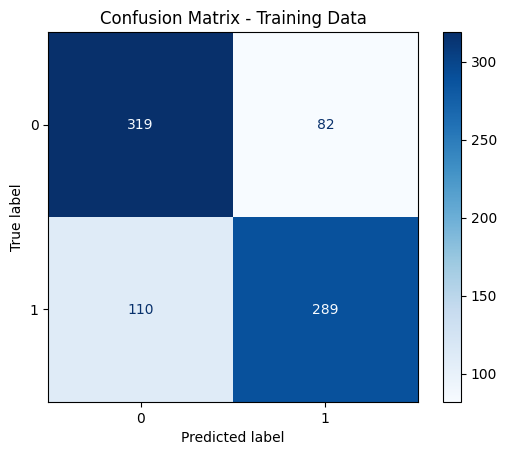

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix for training data
ConfusionMatrixDisplay.from_estimator(model, X_train_scaled, Y_train, cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.show()



Accuracy score on the test data

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
print('Test Accuracy: {:.3f}'.format(accuracy_score(Y_test, y_pred)))

Test Accuracy: 0.750


Building a Predictive System

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Input data: one instance representing a single person's medical data
input_data = (5,166,72,19,175,25.8,0.587,51)

# Define the feature names in the correct order used during training
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Step 1: Create a DataFrame from the input data with feature names
input_df = pd.DataFrame([input_data], columns=feature_names)

# Step 2: Standardize the input using the same scaler fitted on training data
std_data = scaler.transform(input_df)
print(std_data)

# Step 3: Make a prediction using the trained classifier
prediction = model.predict(std_data)
print(prediction)

# Step 4: Interpret the prediction result
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.34373697  1.28244955  0.11963802 -0.12955409  0.78354593 -0.94300138
   0.27139419  1.51879028]]
[1]
The person is diabetic


saving the trained model

In [ ]:
import pickle

In [ ]:
filename="diabetes_model.sav"
pickle.dump(model,open(filename,"wb"))